In [19]:
import torch
import torch.nn as nn
from torchsummary import summary
from model import Net
from dataset import DatasetLoader
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F

from torch.optim.lr_scheduler import StepLR
from func_train_test import train, test
from rf_calculator import summary_with_rf

get_data = DatasetLoader(batch_size=128)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')






Files already downloaded and verified


/home/xpz1/tsai_work/ERAV4/S7_Assignment/transforms.py:51: UserWarning: Argument 'fill_value' is not valid and will be ignored.
  A.CoarseDropout(max_holes=1, max_height=8, max_width=8, min_height=4, min_width=4, fill_value=0, mask_fill_value=None, p=0.5),
/home/xpz1/tsai_work/ERAV4/S7_Assignment/transforms.py:51: UserWarning: Argument 'mask_fill_value' is not valid and will be ignored.
  A.CoarseDropout(max_holes=1, max_height=8, max_width=8, min_height=4, min_width=4, fill_value=0, mask_fill_value=None, p=0.5),


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Shape of the batch - torch.Size([128, 3, 32, 32])
Total images in the batch - 128


In [20]:
use_cuda = torch.cuda.is_available()
print(f"Cuda available ###### {use_cuda}")
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))
summary_with_rf(model, input_size=(3, 32, 32))

Cuda available ###### True
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 32, 32]           4,608
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 64, 32, 32]          18,432
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]             576
           Conv2d-11           [-1, 64, 32, 32]           4,096
             ReLU-12           [-1, 64, 32, 32]               0
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       

In [25]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
criterion = F.nll_loss
#criterion = nn.CrossEntropyLoss()

# Use OneCycleLR scheduler
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=0.1,
    epochs=50,
    steps_per_epoch=len(train_loader)
)

train_losses = []
test_losses = []
train_acc = []
test_acc = []
lrs = []

EPOCHS = 35
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss_avg, train_acc_avg = train(model, device, train_loader, optimizer, criterion, scheduler, epoch)
    test_loss_avg, test_acc_avg, misclass_data = test(model, device, test_loader, criterion)
    train_losses.append(train_loss_avg)
    train_acc.append(train_acc_avg)
    test_losses.append(test_loss_avg)
    test_acc.append(test_acc_avg)
    lrs.append(scheduler.get_last_lr()[0])  # store last LR of this epoch


EPOCH: 0


Epoch=0 LR=0.00505 Avg Training loss=1.6221 Batch Loss=1.2988 Batch_id=390, Acc=39.75: 100%|██████████| 391/391 [00:06<00:00, 64.60it/s]



Test set: Average loss: 1.3513, Accuracy: 50.55%

EPOCH: 1


Epoch=1 LR=0.00815 Avg Training loss=1.2904 Batch Loss=1.0019 Batch_id=390, Acc=52.94: 100%|██████████| 391/391 [00:06<00:00, 64.01it/s]



Test set: Average loss: 1.2230, Accuracy: 56.40%

EPOCH: 2


Epoch=2 LR=0.01317 Avg Training loss=1.1312 Batch Loss=0.9861 Batch_id=390, Acc=59.38: 100%|██████████| 391/391 [00:05<00:00, 65.31it/s]



Test set: Average loss: 1.0318, Accuracy: 63.90%

EPOCH: 3


Epoch=3 LR=0.01989 Avg Training loss=1.0101 Batch Loss=0.9262 Batch_id=390, Acc=63.90: 100%|██████████| 391/391 [00:05<00:00, 65.22it/s]



Test set: Average loss: 0.8781, Accuracy: 68.50%

EPOCH: 4


Epoch=4 LR=0.02801 Avg Training loss=0.9131 Batch Loss=0.8819 Batch_id=390, Acc=67.80: 100%|██████████| 391/391 [00:06<00:00, 64.42it/s]



Test set: Average loss: 0.8341, Accuracy: 71.08%

EPOCH: 5


Epoch=5 LR=0.03718 Avg Training loss=0.8496 Batch Loss=0.9776 Batch_id=390, Acc=70.25: 100%|██████████| 391/391 [00:06<00:00, 64.43it/s]



Test set: Average loss: 0.7971, Accuracy: 71.89%

EPOCH: 6


Epoch=6 LR=0.04699 Avg Training loss=0.8046 Batch Loss=0.7656 Batch_id=390, Acc=71.68: 100%|██████████| 391/391 [00:05<00:00, 65.34it/s]



Test set: Average loss: 0.7421, Accuracy: 74.94%

EPOCH: 7


Epoch=7 LR=0.05703 Avg Training loss=0.7633 Batch Loss=0.9081 Batch_id=390, Acc=73.19: 100%|██████████| 391/391 [00:05<00:00, 65.24it/s]



Test set: Average loss: 0.7362, Accuracy: 75.13%

EPOCH: 8


Epoch=8 LR=0.06685 Avg Training loss=0.7243 Batch Loss=0.6929 Batch_id=390, Acc=74.68: 100%|██████████| 391/391 [00:06<00:00, 65.06it/s]



Test set: Average loss: 0.7127, Accuracy: 76.11%

EPOCH: 9


Epoch=9 LR=0.07601 Avg Training loss=0.6965 Batch Loss=0.6055 Batch_id=390, Acc=75.80: 100%|██████████| 391/391 [00:06<00:00, 64.51it/s]



Test set: Average loss: 0.6862, Accuracy: 76.62%

EPOCH: 10


Epoch=10 LR=0.08413 Avg Training loss=0.6749 Batch Loss=0.6714 Batch_id=390, Acc=76.59: 100%|██████████| 391/391 [00:06<00:00, 64.68it/s]



Test set: Average loss: 0.6515, Accuracy: 78.37%

EPOCH: 11


Epoch=11 LR=0.09084 Avg Training loss=0.6473 Batch Loss=0.5175 Batch_id=390, Acc=77.40: 100%|██████████| 391/391 [00:06<00:00, 64.33it/s]



Test set: Average loss: 0.6081, Accuracy: 79.33%

EPOCH: 12


Epoch=12 LR=0.09586 Avg Training loss=0.6275 Batch Loss=0.7326 Batch_id=390, Acc=78.19: 100%|██████████| 391/391 [00:06<00:00, 64.86it/s]



Test set: Average loss: 0.6018, Accuracy: 79.26%

EPOCH: 13


Epoch=13 LR=0.09896 Avg Training loss=0.6064 Batch Loss=0.7123 Batch_id=390, Acc=78.94: 100%|██████████| 391/391 [00:06<00:00, 64.84it/s]



Test set: Average loss: 0.5698, Accuracy: 81.06%

EPOCH: 14


Epoch=14 LR=0.10000 Avg Training loss=0.5932 Batch Loss=0.4842 Batch_id=390, Acc=79.37: 100%|██████████| 391/391 [00:06<00:00, 63.72it/s]



Test set: Average loss: 0.5937, Accuracy: 79.56%

EPOCH: 15


Epoch=15 LR=0.09980 Avg Training loss=0.5853 Batch Loss=0.4577 Batch_id=390, Acc=79.72: 100%|██████████| 391/391 [00:06<00:00, 64.18it/s]



Test set: Average loss: 0.5712, Accuracy: 80.38%

EPOCH: 16


Epoch=16 LR=0.09919 Avg Training loss=0.5598 Batch Loss=0.4414 Batch_id=390, Acc=80.57: 100%|██████████| 391/391 [00:06<00:00, 63.76it/s]



Test set: Average loss: 0.5503, Accuracy: 81.11%

EPOCH: 17


Epoch=17 LR=0.09820 Avg Training loss=0.5532 Batch Loss=0.6390 Batch_id=390, Acc=80.76: 100%|██████████| 391/391 [00:06<00:00, 64.88it/s]



Test set: Average loss: 0.5144, Accuracy: 82.89%

EPOCH: 18


Epoch=18 LR=0.09681 Avg Training loss=0.5372 Batch Loss=0.4700 Batch_id=390, Acc=81.47: 100%|██████████| 391/391 [00:06<00:00, 64.46it/s]



Test set: Average loss: 0.5008, Accuracy: 82.64%

EPOCH: 19


Epoch=19 LR=0.09504 Avg Training loss=0.5280 Batch Loss=0.5759 Batch_id=390, Acc=81.67: 100%|██████████| 391/391 [00:06<00:00, 64.49it/s]



Test set: Average loss: 0.5135, Accuracy: 82.36%

EPOCH: 20


Epoch=20 LR=0.09292 Avg Training loss=0.5154 Batch Loss=0.3332 Batch_id=390, Acc=82.14: 100%|██████████| 391/391 [00:06<00:00, 62.97it/s]



Test set: Average loss: 0.5027, Accuracy: 83.09%

EPOCH: 21


Epoch=21 LR=0.09044 Avg Training loss=0.5120 Batch Loss=0.5710 Batch_id=390, Acc=82.27: 100%|██████████| 391/391 [00:06<00:00, 63.44it/s]



Test set: Average loss: 0.5554, Accuracy: 81.03%

EPOCH: 22


Epoch=22 LR=0.08765 Avg Training loss=0.4979 Batch Loss=0.5436 Batch_id=390, Acc=82.74: 100%|██████████| 391/391 [00:06<00:00, 63.92it/s]



Test set: Average loss: 0.4968, Accuracy: 83.37%

EPOCH: 23


Epoch=23 LR=0.08454 Avg Training loss=0.4874 Batch Loss=0.6068 Batch_id=390, Acc=83.03: 100%|██████████| 391/391 [00:06<00:00, 62.14it/s]



Test set: Average loss: 0.5462, Accuracy: 81.43%

EPOCH: 24


Epoch=24 LR=0.08117 Avg Training loss=0.4771 Batch Loss=0.4615 Batch_id=390, Acc=83.57: 100%|██████████| 391/391 [00:06<00:00, 62.65it/s]



Test set: Average loss: 0.4810, Accuracy: 83.88%

EPOCH: 25


Epoch=25 LR=0.07754 Avg Training loss=0.4748 Batch Loss=0.2808 Batch_id=390, Acc=83.54: 100%|██████████| 391/391 [00:06<00:00, 63.09it/s]



Test set: Average loss: 0.4684, Accuracy: 84.09%

EPOCH: 26


Epoch=26 LR=0.07368 Avg Training loss=0.4608 Batch Loss=0.4417 Batch_id=390, Acc=84.08: 100%|██████████| 391/391 [00:06<00:00, 62.48it/s]



Test set: Average loss: 0.4698, Accuracy: 83.67%

EPOCH: 27


Epoch=27 LR=0.06964 Avg Training loss=0.4540 Batch Loss=0.5125 Batch_id=390, Acc=84.20: 100%|██████████| 391/391 [00:06<00:00, 62.60it/s]



Test set: Average loss: 0.4475, Accuracy: 84.93%

EPOCH: 28


Epoch=28 LR=0.06544 Avg Training loss=0.4457 Batch Loss=0.5731 Batch_id=390, Acc=84.44: 100%|██████████| 391/391 [00:06<00:00, 62.96it/s]



Test set: Average loss: 0.4519, Accuracy: 84.86%

EPOCH: 29


Epoch=29 LR=0.06112 Avg Training loss=0.4448 Batch Loss=0.4000 Batch_id=390, Acc=84.55: 100%|██████████| 391/391 [00:06<00:00, 62.73it/s]



Test set: Average loss: 0.4368, Accuracy: 84.91%

EPOCH: 30


Epoch=30 LR=0.05670 Avg Training loss=0.4283 Batch Loss=0.4754 Batch_id=390, Acc=85.12: 100%|██████████| 391/391 [00:06<00:00, 62.20it/s]



Test set: Average loss: 0.4381, Accuracy: 85.24%

EPOCH: 31


Epoch=31 LR=0.05223 Avg Training loss=0.4228 Batch Loss=0.3813 Batch_id=390, Acc=85.27: 100%|██████████| 391/391 [00:06<00:00, 62.19it/s]



Test set: Average loss: 0.4361, Accuracy: 85.07%

EPOCH: 32


Epoch=32 LR=0.04775 Avg Training loss=0.4071 Batch Loss=0.3535 Batch_id=390, Acc=85.78: 100%|██████████| 391/391 [00:06<00:00, 62.25it/s]



Test set: Average loss: 0.4127, Accuracy: 85.83%

EPOCH: 33


Epoch=33 LR=0.04328 Avg Training loss=0.4013 Batch Loss=0.3336 Batch_id=390, Acc=85.91: 100%|██████████| 391/391 [00:06<00:00, 62.79it/s]



Test set: Average loss: 0.4376, Accuracy: 84.97%

EPOCH: 34


Epoch=34 LR=0.03886 Avg Training loss=0.3918 Batch Loss=0.3553 Batch_id=390, Acc=86.29: 100%|██████████| 391/391 [00:06<00:00, 62.99it/s]



Test set: Average loss: 0.4089, Accuracy: 86.29%



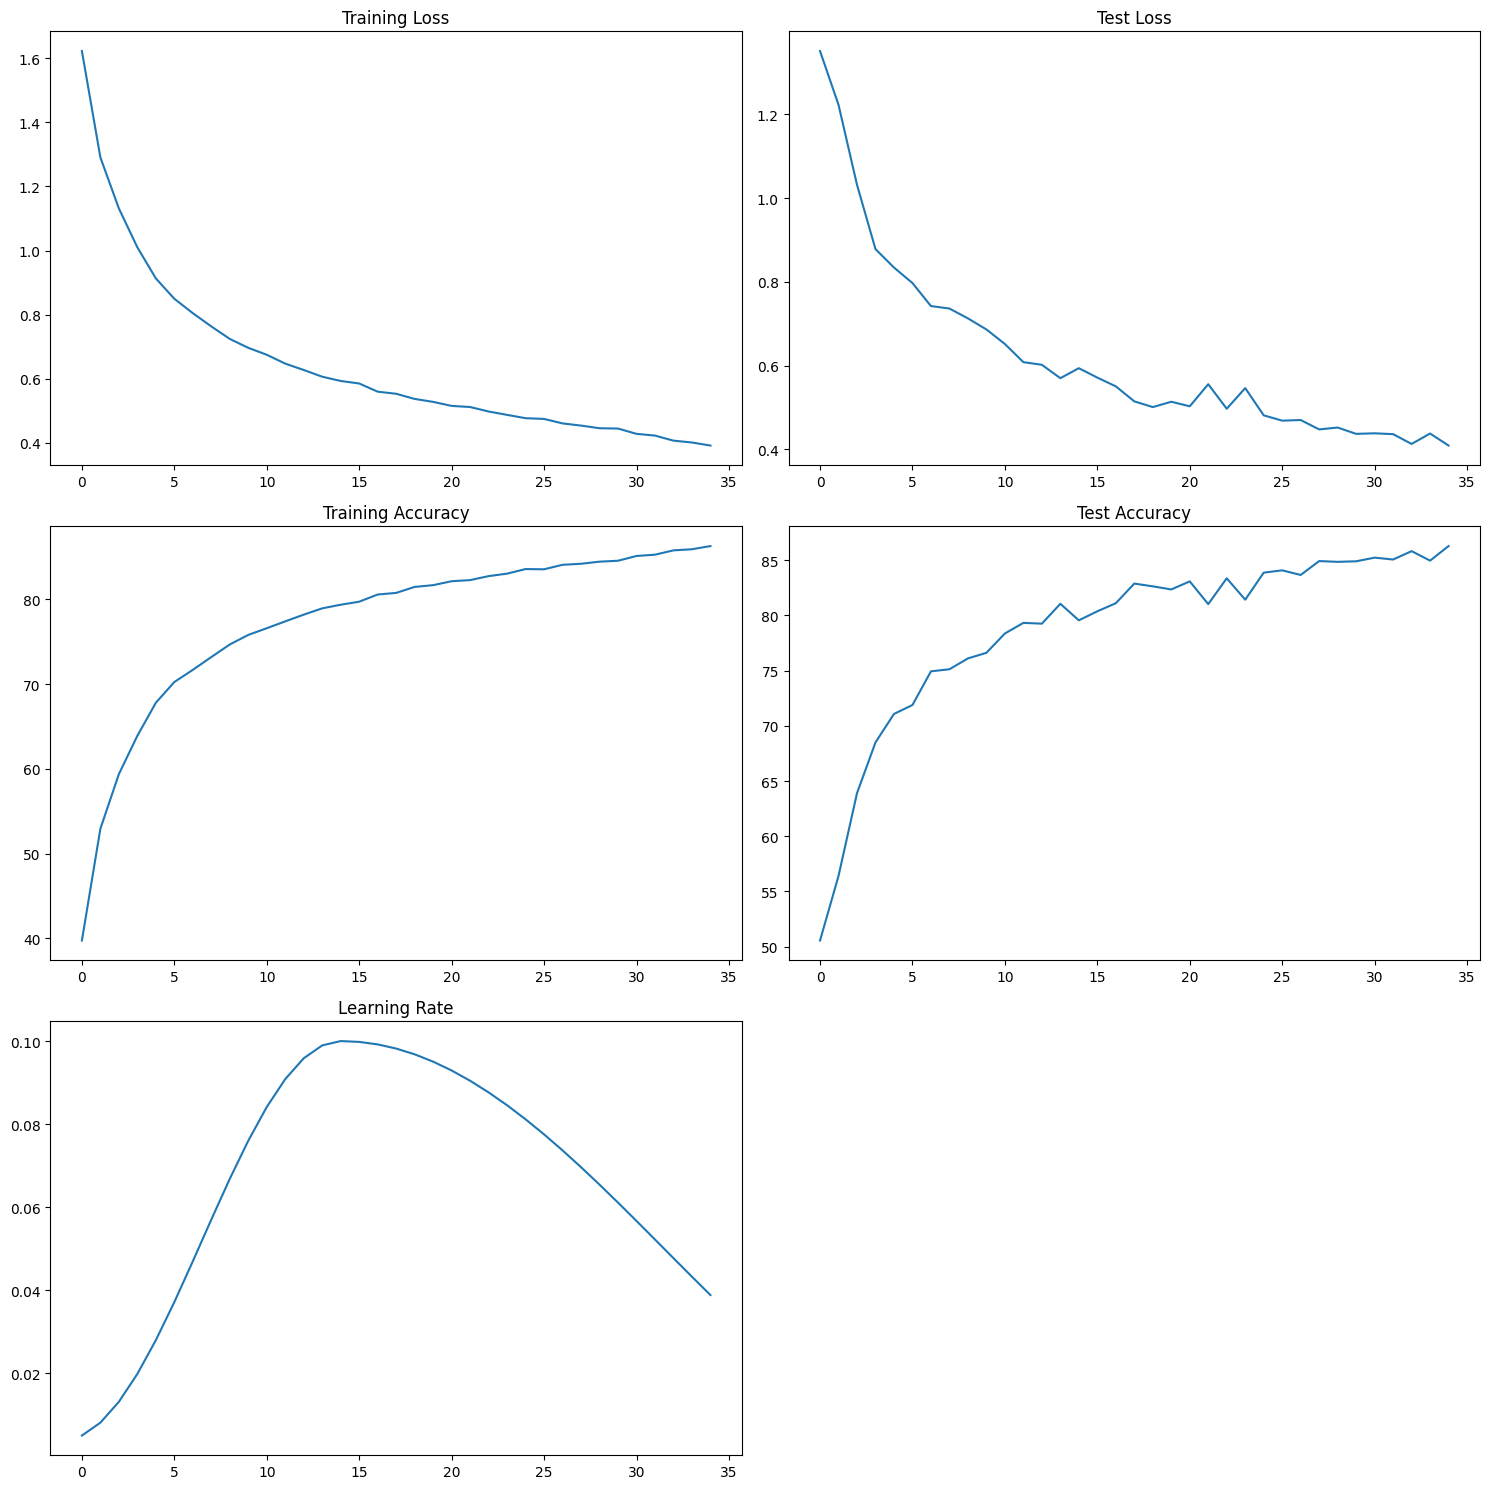

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15,15))

# Training Loss
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")

# Training Accuracy
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")

# Test Loss
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")

# Test Accuracy
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# Learning Rate
axs[2, 0].plot(lrs)
axs[2, 0].set_title("Learning Rate")

# Hide empty subplot if unused
axs[2, 1].axis("off")

plt.tight_layout()
plt.show()